In [1]:
#CÓODIGO REFERENTE AL ANÁLISIS DE DATOS DEL TFG DE BA: "LA CAPACIDAD PREDICTIVA EN EL PRECIO DE LAS ACCIONES"
#EURO STOXX SUSTAINABILITY- CÓDIGO
#AUTOR:  ROCIO ARTIAGA CANDIA
#CARGA DE LIBRERIAS
import pandas as pd
from sklearn.linear_model import LinearRegression 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
from statsmodels.regression.rolling import RollingOLS
import warnings
warnings.filterwarnings('ignore')

In [2]:
#CARGA DE LOS DATOS DE INDICES EURO STOXX SUSTAINABILITY, EURO STOXX, Y SUB-ÍNDICES DE SECTORES
df = pd.read_excel (r'/Users/rocioartiaga/Desktop/indices/STOXX/euro-stoxx-data-4.xlsx')


In [3]:
#ESTABLECER LOS EJES
df.set_axis(['Date', 'ES-SUST', 'ES','HC', 'UT', 'EN'], 
                    axis='columns', inplace=True)


In [4]:
#CÁLCULO DE LAS RENTABILIDADESA
df['ES-SUST']= df['ES-SUST'].pct_change(-1)
df['ES']=df['ES'].pct_change(-1)
df['HC']=df['HC'].pct_change(-1)
df['UT']=df['UT'].pct_change(-1)
df['EN']=df['EN'].pct_change(-1)

In [5]:
#ELIMINAR NA
df.dropna()

,Date,ES-SUST,ES,HC,UT,EN
0,2021-03-08,0.022768,0.023544,0.012983,0.016179,0.001958
1,2021-03-05,-0.010562,-0.009089,-0.007309,-0.001278,0.003930
2,2021-03-04,-0.005436,-0.003077,0.003125,0.017216,0.015440
3,2021-03-03,-0.002784,0.000339,-0.016621,-0.025915,0.001367
4,2021-03-02,-0.000805,-0.000339,-0.002690,-0.009034,-0.002099
...,...,...,...,...,...,...
2714,2010-08-11,-0.026726,-0.026226,-0.015890,-0.020055,0.000000
2715,2010-08-10,-0.009802,-0.010116,-0.000541,-0.006230,0.000000
2716,2010-08-09,0.015553,0.014374,0.013170,0.014559,0.000000
2717,2010-08-06,-0.014107,-0.013583,-0.010656,-0.017425,0.000000


In [6]:
#CÁLCULOO DE LA PRIMA ESG COMO DIFEREENCIA DE EURO STOXX SUSTAINABILITY Y EURO STOXX
df['primaESG']= df['ES-SUST']- df['ES']

In [7]:
#ORDEN DE VALORES
df=df.sort_values(by='Date')

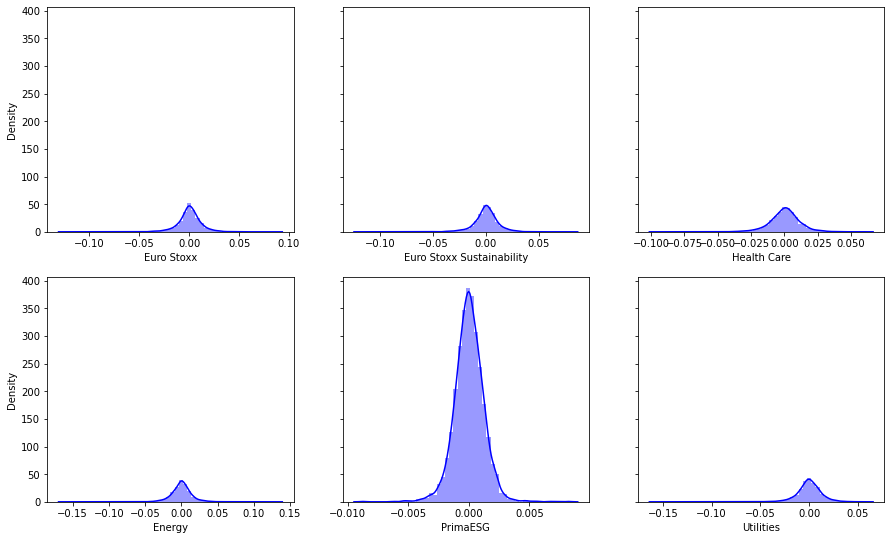

In [8]:
#DISTRIBUCIÓN DE LAS VARIABLES NUMÉRICAS DEL DATASET 
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)

sns.distplot(df['ES'] , color="blue", ax=axes[0,0], axlabel='Euro Stoxx')
sns.distplot(df['ES-SUST'] , color="blue", ax=axes[0,1], axlabel='Euro Stoxx Sustainability')
sns.distplot(df['primaESG'] , color="blue", ax=axes[1,1], axlabel= 'PrimaESG')
sns.distplot(df['UT'] , color="blue", ax=axes[1,2], axlabel='Utilities')
sns.distplot(df['EN'] , color="blue", ax=axes[1,0], axlabel= 'Energy')
sns.distplot(df['HC'] , color="blue", ax=axes[0,2], axlabel='Health Care')
plt.subplots_adjust(top=1.5)

In [9]:
#DESCRIPCIÓN DE LAS VARIABLES
df.describe()

,ES-SUST,ES,HC,UT,EN,primaESG
count,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000
mean,0.000260,0.000234,0.000340,0.000098,0.000099,0.000025
std,0.011760,0.012039,0.011318,0.012662,0.014764,0.001213
min,-0.117846,-0.123542,-0.094362,-0.156122,-0.160259,-0.008736
25%,-0.005093,-0.005178,-0.005821,-0.006159,-0.007057,-0.000676
50%,0.000471,0.000343,0.000512,0.000106,0.000185,0.000023
75%,0.006156,0.006221,0.006629,0.007064,0.007362,0.000737
max,0.079726,0.085918,0.059490,0.057768,0.130290,0.008249


In [10]:
#ORDEN DE LOS REGISTROS
df=df.sort_values(by='Date')

In [11]:
#ELIMINAR VALORES INFINITOS 
df.replace([np.inf, -np.inf], np.nan)

df.dropna(inplace=True)

In [12]:
#ahoora procedemos a dividir por periodos, estratificar la muestra
start_date1 = "2010-8-04"
end_date1 = "2011-12-31"

after_start_date1 = df["Date"] >= start_date1
before_end_date1 = df["Date"] <= end_date1
between_two_dates1 = after_start_date1 & before_end_date1
filtered_dates1 = df.loc[between_two_dates1]
subset1= filtered_dates1

In [13]:
start_date2 = "2012-1-1"
end_date2 = "2013-12-31"

after_start_date2 = df["Date"] >= start_date2
before_end_date2 = df["Date"] <= end_date2
between_two_dates2 = after_start_date2 & before_end_date2
filtered_dates2 = df.loc[between_two_dates2]
subset2= filtered_dates2

In [14]:
start_date3 = "2014-1-1"
end_date3 = "2015-12-31"

after_start_date3 = df["Date"] >= start_date3
before_end_date3 = df["Date"] <= end_date3
between_two_dates3 = after_start_date3 & before_end_date3
filtered_dates3 = df.loc[between_two_dates3]
subset3= filtered_dates3

In [15]:
start_date4 = "2016-1-1"
end_date4 = "2017-12-31"

after_start_date4 = df["Date"] >= start_date4
before_end_date4 = df["Date"] <= end_date4
between_two_dates4 = after_start_date4 & before_end_date4
filtered_dates4 = df.loc[between_two_dates4]
subset4= filtered_dates4

In [16]:
start_date5 = "2018-1-1"
end_date5 = "2019-12-31"

after_start_date5 = df["Date"] >= start_date5
before_end_date5 = df["Date"] <= end_date5
between_two_dates5 = after_start_date5 & before_end_date5
filtered_dates5 = df.loc[between_two_dates5]
subset5= filtered_dates5

In [17]:
start_date6 = "2020-1-1"
end_date6 = "2021-3-8"

after_start_date6 = df["Date"] >= start_date6
before_end_date6 = df["Date"] <= end_date6
between_two_dates6 = after_start_date6 & before_end_date6
filtered_dates6 = df.loc[between_two_dates6]
subset6= filtered_dates6

In [18]:
#PERÍODO 7: PERÍODO DESDE 2011 PARA CALCULAR POSTERIORMENTE SHARPE RATIO
start_date7 = "2012-1-1"
end_date7 = "2021-3-8"

after_start_date7 = df["Date"] >= start_date7
before_end_date7 = df["Date"] <= end_date7
between_two_dates7 = after_start_date7 & before_end_date7
filtered_dates7 = df.loc[between_two_dates7]
subset7= filtered_dates7

In [19]:
subset7=subset7.set_index('Date')

In [20]:
df=df.set_index('Date')

<AxesSubplot:title={'center':'CORRELACIÓN PRIMA ESG EN EL SECTOR DE LA SALUD'}, xlabel='Date'>

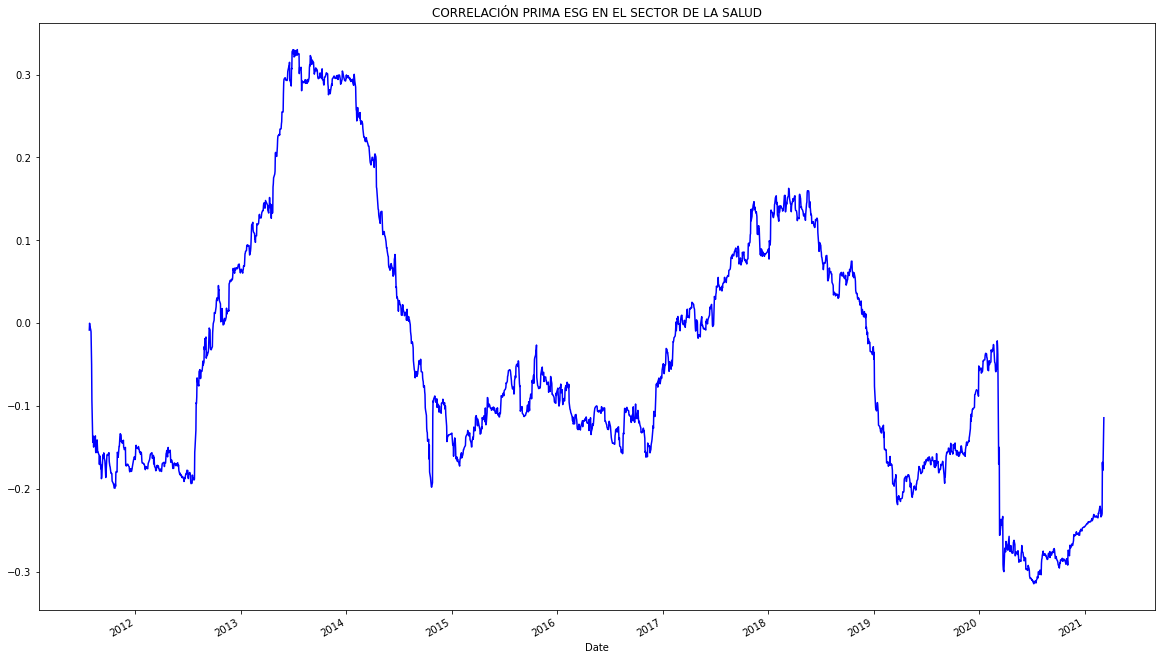

In [21]:
#CÁLCULO CON ROLLING CORRELATION 

df['primaESG'].rolling(253).corr(df['HC']).plot (title='CORRELACIÓN PRIMA ESG EN EL SECTOR DE LA SALUD', figsize=(20,12), color='blue')

<AxesSubplot:title={'center':'CORRELACIÓN PRIMA ESG EN EL SECTOR SERVICIOS'}, xlabel='Date'>

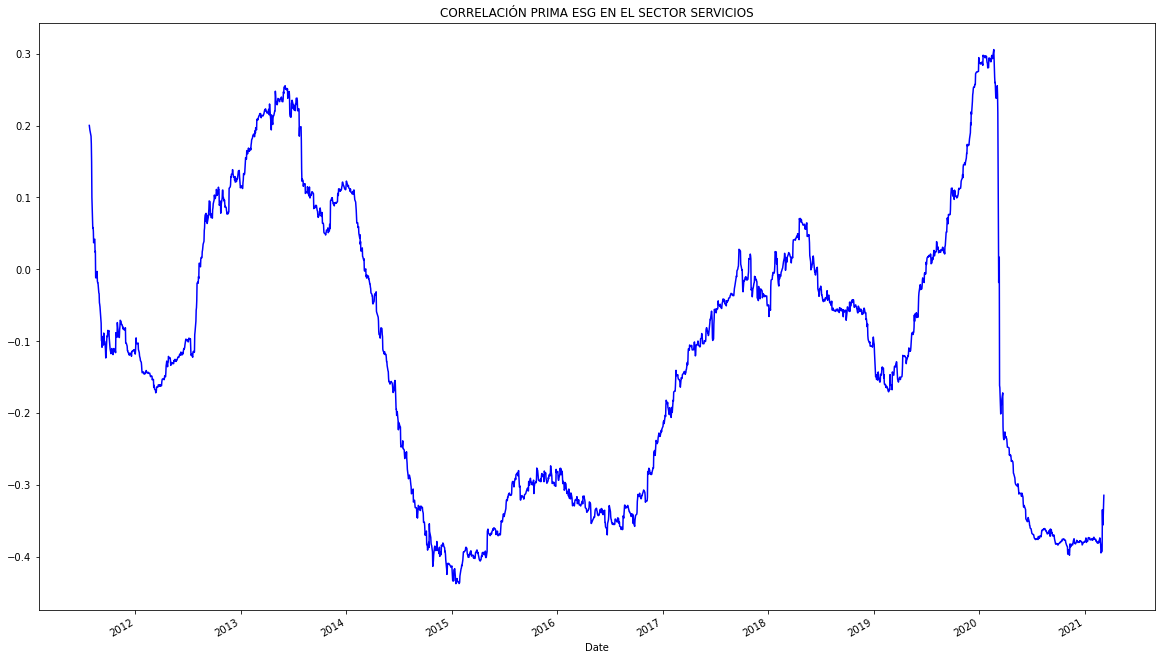

In [22]:
df['primaESG'].rolling(253).corr(df['UT']).plot (title='CORRELACIÓN PRIMA ESG EN EL SECTOR SERVICIOS', figsize=(20,12), color='blue')

<AxesSubplot:title={'center':'CORRELACIÓN PRIMA ESG EN EL SECTOR ENERGÉTICO'}, xlabel='Date'>

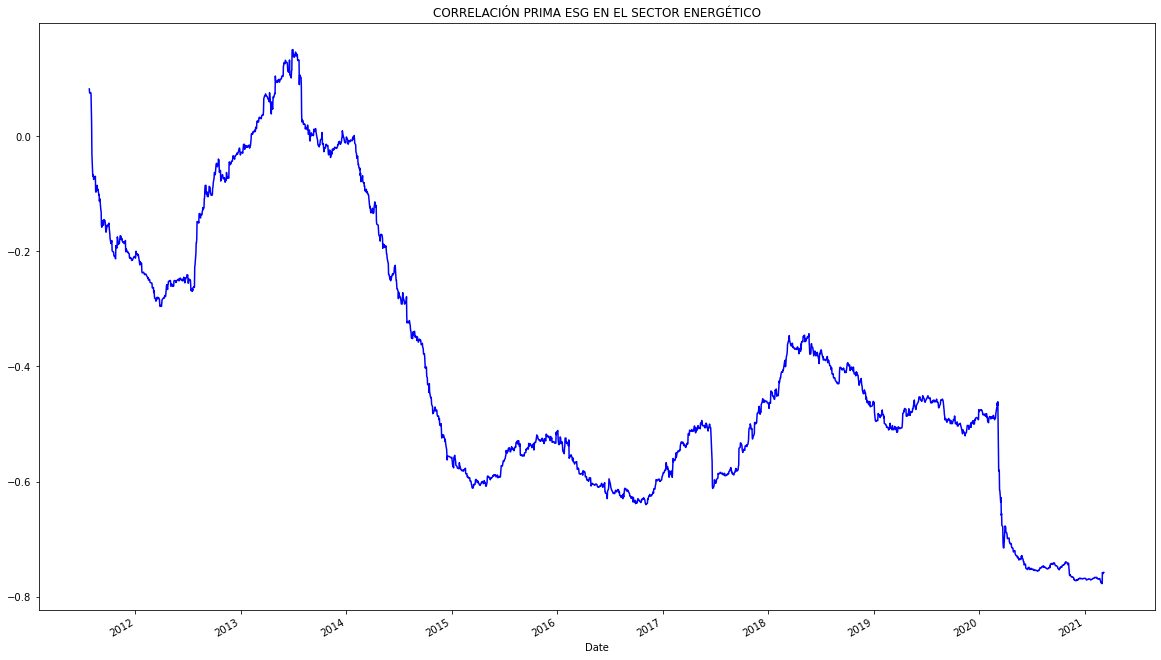

In [23]:
df['primaESG'].rolling(253).corr(df['EN']).plot (title='CORRELACIÓN PRIMA ESG EN EL SECTOR ENERGÉTICO', figsize=(20,12), color='blue')


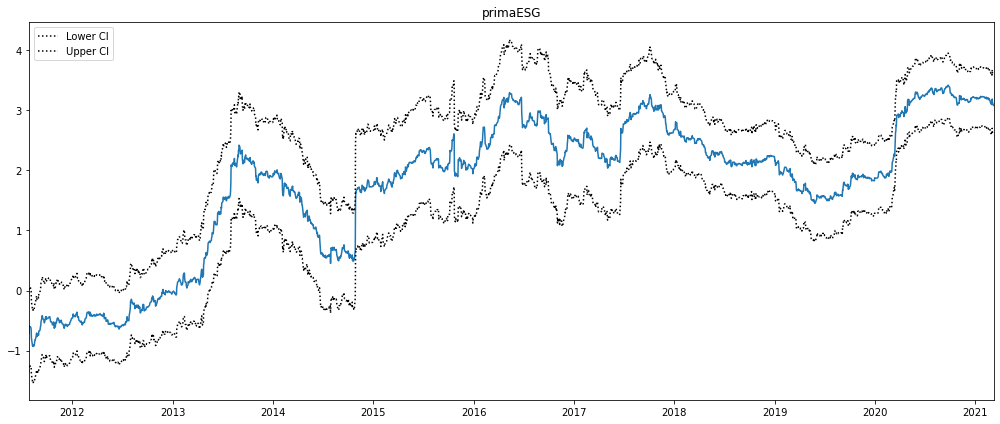

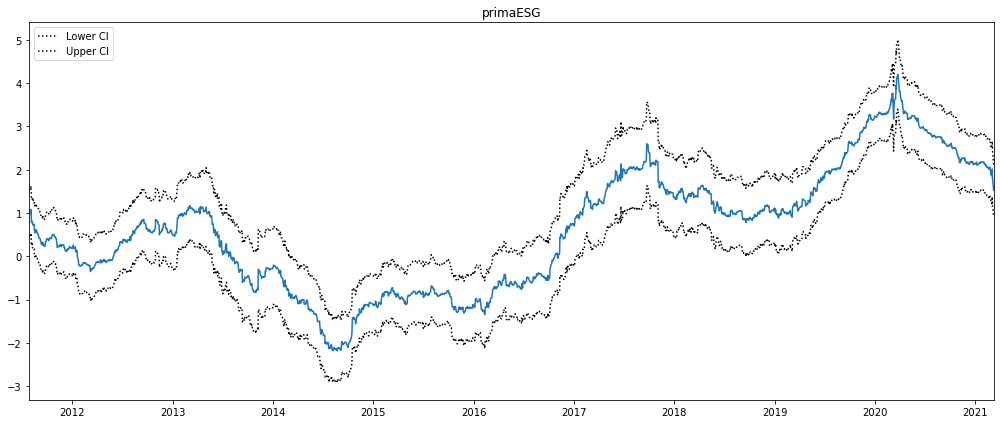

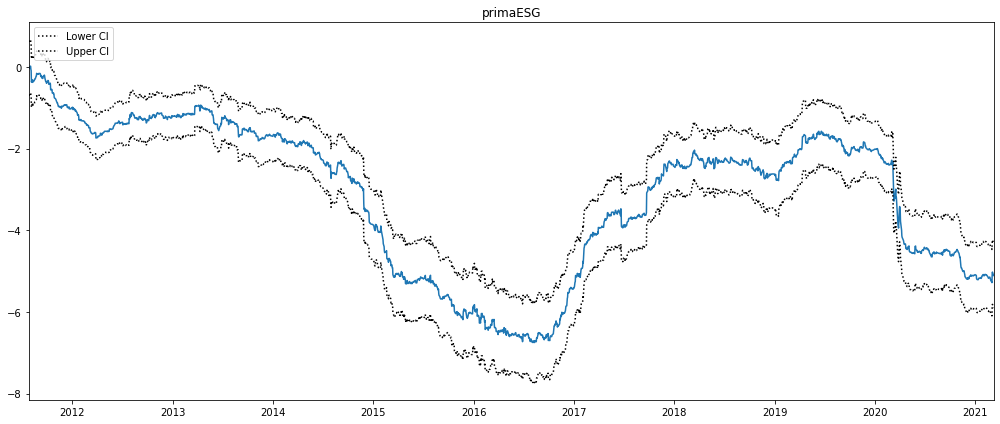

In [24]:
#CÁLCULO CON ROLLING REGRESSION PRIMA ESG 

#SECTORES SOBRE LOS QUE SE VA A CALCULAR EL COEFICIENTE DE LA PRIMA ESG CON ROLLING REGRESSION
items= df[['HC', 'UT','EN']]

#SE EMPLEA UN LOOP PARA SER MÁS EFICIENTE
for i in items: 

    X = df[['ES', 'primaESG']]
    y = items[i]
    
    exog = sm.add_constant(X)
    rols = RollingOLS(endog=y, exog=exog,window=253,)
    modelo = rols.fit()
    params=modelo.params
    fig = modelo.plot_recursive_coefficient(variables=['primaESG'], figsize=(14,6)) #Gráfico del coeficiente asignado a la prima ESG

In [25]:
#DEFINIR FUNCIÓN DE ROLLING SHARPE RATIO
def my_rolling_sharpe(y):
    return np.sqrt(253) * (y.mean() / y.std())

In [26]:
#CÁLCULO DE SHARPE RATIO
subset7['EURO STOXX SUSTAINABILITY'] = subset7['ES-SUST'].rolling('253d').apply(my_rolling_sharpe)
subset7['EURO STOXX'] = subset7['ES'].rolling('253d').apply(my_rolling_sharpe)

<AxesSubplot:title={'center':'SHARPE RATIO EURO STOXX SUSTAINABLITY Y EURO STOXX'}, xlabel='Date'>

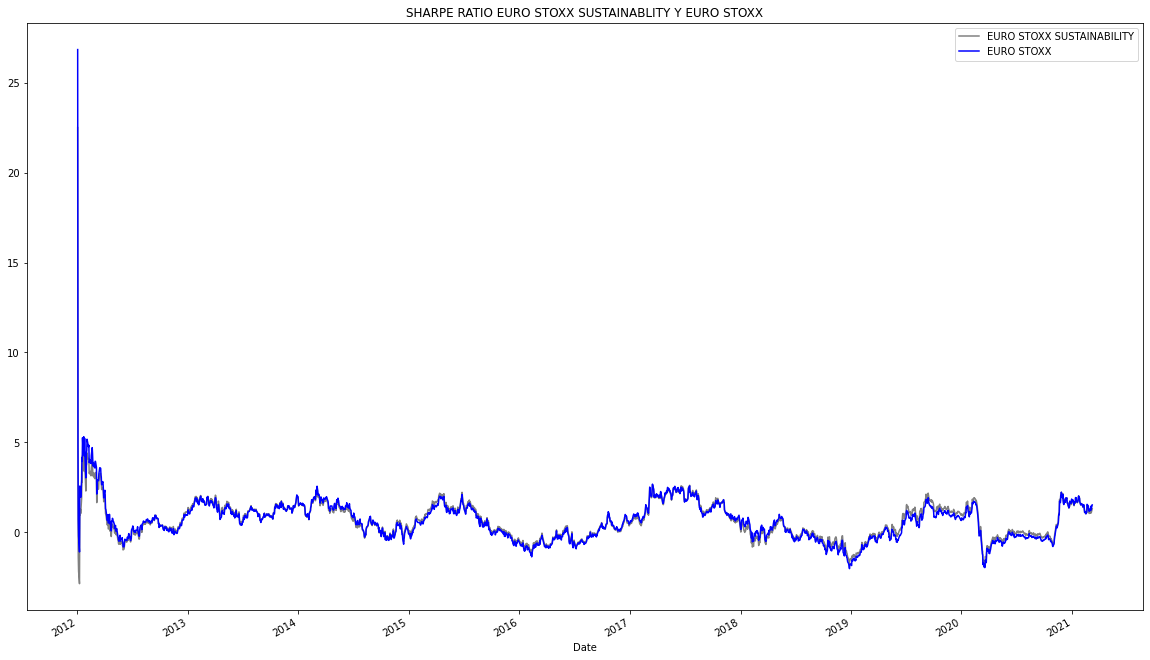

In [27]:
#GRÁFICA DE SHARPE RATIO
subset7.plot(title= 'SHARPE RATIO EURO STOXX SUSTAINABLITY Y EURO STOXX',y=['EURO STOXX SUSTAINABILITY', 'EURO STOXX'], figsize=(20,12), color=('grey','blue'))

In [28]:
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

Modelo ['HC']                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2153.
Date:                Wed, 16 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:20:57   Log-Likelihood:                 7848.5
No. Observations:                2175   AIC:                        -1.569e+04
Df Residuals:                    2172   BIC:                        -1.567e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.418e-05      0.000      

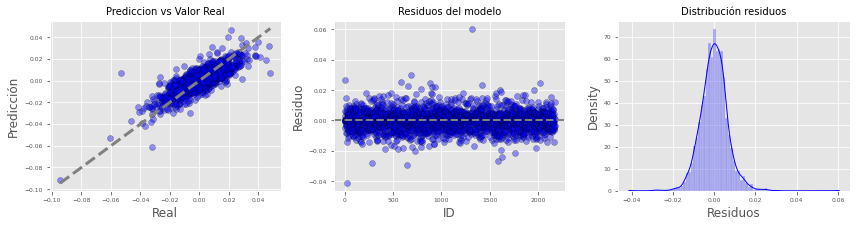

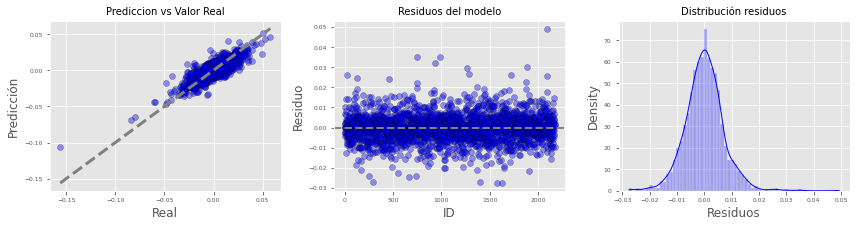

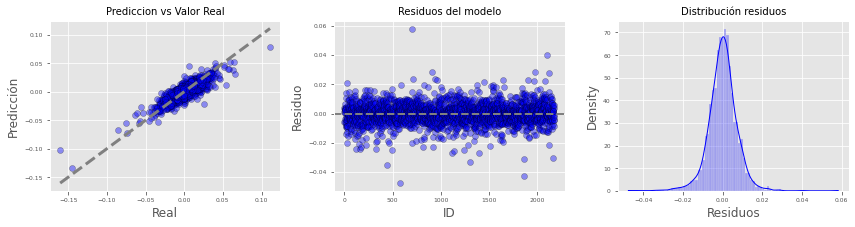

In [29]:
#PERÍODO ENTERO PARA ESTIMAR LA REGRESIÓN

#SECTORES SOBRE LOS QUE SE ESTIMARÁ EL MODELO
items= df[['HC', 'UT','EN']]

for i in items:
    X = df[['ES', 'primaESG']]
    y = df[i]

    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y.values.reshape(-1,1),
                                            train_size   = 0.8,
                                            random_state = 1234,
                                            shuffle      = True
                                        )
    X_train = sm.add_constant(X_train, prepend=True)
    modelo = sm.OLS(endog=y_train, exog=X_train,)
    modelo = modelo.fit()
    print("Modelo", [i], modelo.summary())
    
    #ESTUDIO DE LOS RESIDUOS
    #cálculo de los residuos
    y_train = y_train.flatten() 
    prediccion_train = modelo.predict(exog = X_train)
    residuos_train   = prediccion_train - y_train
    
    #gráficas de los residuos
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

    axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4, color='blue')
    axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                    'k--', color = 'grey', lw=3)
    axes[0, 0].set_title('Prediccion vs Valor Real', fontsize = 10)
    axes[0, 0].set_xlabel('Real')
    axes[0, 0].set_ylabel('Predicción')
    axes[0, 0].tick_params(labelsize = 6)

    axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                       edgecolors=(0, 0, 0), alpha = 0.4, color='blue')
    axes[0, 1].axhline(y = 0, linestyle = '--', color = 'grey', lw=2)
    axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
    axes[0, 1].set_xlabel('ID')
    axes[0, 1].set_ylabel('Residuo')
    axes[0, 1].tick_params(labelsize = 6)

    sns.histplot(
        data    = residuos_train,
        stat    = "density",
        kde     = True,
        line_kws= {'linewidth': 1},
        color   = "blue",
        alpha   = 0.3,
        ax      = axes[0, 2]
    )

    axes[0, 2].set_title('Distribución residuos', fontsize = 10)
    axes[0, 2].set_xlabel("Residuos")
    axes[0, 2].tick_params(labelsize = 6)

    # Se eliminan los ejes vacíos
    fig.delaxes(axes[1,0])
    fig.delaxes(axes[1,1])
    fig.delaxes(axes[1,2])

    fig.tight_layout()
    plt.subplots_adjust(top=0.9);

    #SHAPIRO
    shapiro_test = stats.shapiro(residuos_train)
    print([i], shapiro_test)

    print([i],df['primaESG'].corr(df[i]))
    
    #PREDICCIONES EN TEST
    X_test = sm.add_constant(X_test, prepend=True)
    predicciones = modelo.predict(exog = X_test)
    rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
    print("")
    print([i],f"RMSE: {rmse}")

Modelo ['HC']                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     322.7
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           2.90e-74
Time:                        00:20:59   Log-Likelihood:                 1051.8
No. Observations:                 291   AIC:                            -2098.
Df Residuals:                     288   BIC:                            -2087.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      

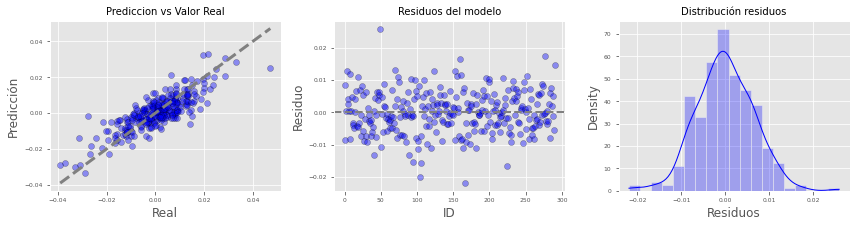

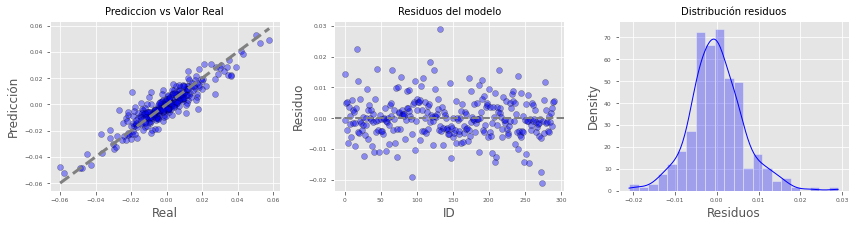

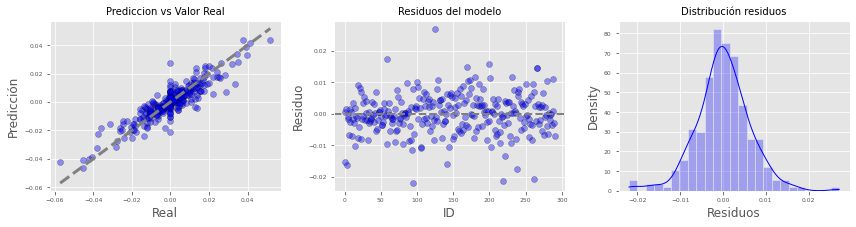

In [30]:
#REGRESIÓN Y RESIDUOS PERIODO 1

#SECTORES
items1= subset1[['HC', 'UT','EN']]

for i in items1:
    X = subset1[['ES', 'primaESG']]
    y = items1[i]

    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y.values.reshape(-1,1),
                                            train_size   = 0.8,
                                            random_state = 1234,
                                            shuffle      = True
                                        )
    X_train = sm.add_constant(X_train, prepend=True)
    modelo = sm.OLS(endog=y_train, exog=X_train,)
    modelo = modelo.fit()
    print("Modelo", [i], modelo.summary())
    
    #ESTUDIO DE LOS RESIDUOS
    #cálculo de los residuos
    y_train = y_train.flatten() 
    prediccion_train = modelo.predict(exog = X_train)
    residuos_train   = prediccion_train - y_train
    
    #gráficas de los residuos
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

    axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4, color='blue')
    axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                    'k--', color = 'grey', lw=3)
    axes[0, 0].set_title('Prediccion vs Valor Real', fontsize = 10)
    axes[0, 0].set_xlabel('Real')
    axes[0, 0].set_ylabel('Predicción')
    axes[0, 0].tick_params(labelsize = 6)

    axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                       edgecolors=(0, 0, 0), alpha = 0.4, color='blue')
    axes[0, 1].axhline(y = 0, linestyle = '--', color = 'grey', lw=2)
    axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
    axes[0, 1].set_xlabel('ID')
    axes[0, 1].set_ylabel('Residuo')
    axes[0, 1].tick_params(labelsize = 6)

    sns.histplot(
        data    = residuos_train,
        stat    = "density",
        kde     = True,
        line_kws= {'linewidth': 1},
        color   = "blue",
        alpha   = 0.3,
        ax      = axes[0, 2]
    )

    axes[0, 2].set_title('Distribución residuos', fontsize = 10)
    axes[0, 2].set_xlabel("Residuos")
    axes[0, 2].tick_params(labelsize = 6)

    # Se eliminan los ejes vacíos
    fig.delaxes(axes[1,0])
    fig.delaxes(axes[1,1])
    fig.delaxes(axes[1,2])

    fig.tight_layout()
    plt.subplots_adjust(top=0.9);

    #SHAPIRO
    shapiro_test = stats.shapiro(residuos_train)
    print([i], shapiro_test)

    #PREDICCIONES
    X_test = sm.add_constant(X_test, prepend=True)
    predicciones = modelo.predict(exog = X_test)
    rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
    print("")
    print([i],f"RMSE: {rmse}")

Modelo ['HC']                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     270.9
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           1.59e-75
Time:                        00:21:01   Log-Likelihood:                 1474.7
No. Observations:                 410   AIC:                            -2943.
Df Residuals:                     407   BIC:                            -2931.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      

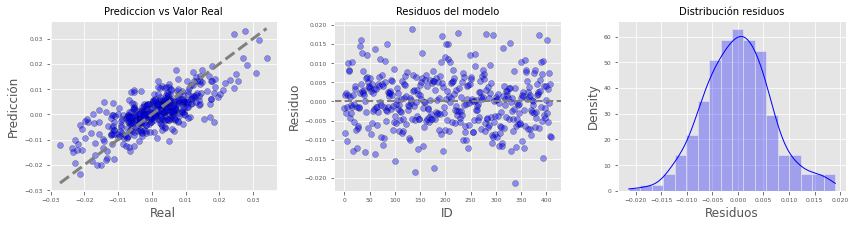

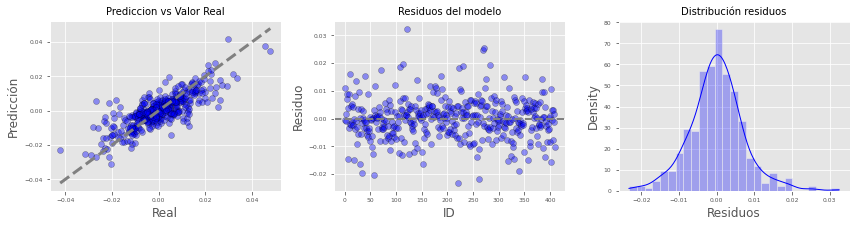

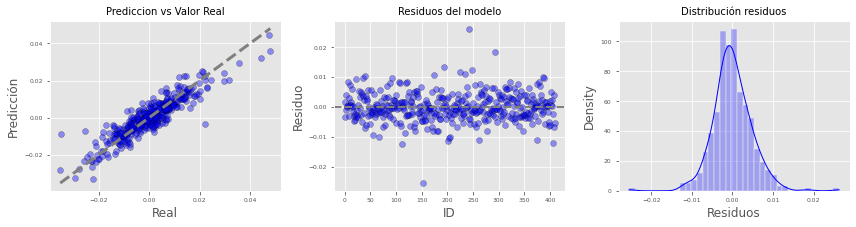

In [31]:
#REGRESIÓN Y RESIDUOS PERIODO 2
items2= subset2[['HC', 'UT','EN']]

for i in items2:
    X = subset2[['ES', 'primaESG']]
    y = items2[i]

    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y.values.reshape(-1,1),
                                            train_size   = 0.8,
                                            random_state = 1234,
                                            shuffle      = True
                                        )
    X_train = sm.add_constant(X_train, prepend=True)
    modelo = sm.OLS(endog=y_train, exog=X_train,)
    modelo = modelo.fit()
    print("Modelo", [i], modelo.summary())
    
    #ESTUDIO DE LOS RESIDUOS
    #cálculo de los residuos
    y_train = y_train.flatten() 
    prediccion_train = modelo.predict(exog = X_train)
    residuos_train   = prediccion_train - y_train
    
    #gráficas de los residuos
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

    axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4, color='blue')
    axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                    'k--', color = 'grey', lw=3)
    axes[0, 0].set_title('Prediccion vs Valor Real', fontsize = 10)
    axes[0, 0].set_xlabel('Real')
    axes[0, 0].set_ylabel('Predicción')
    axes[0, 0].tick_params(labelsize = 6)

    axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                       edgecolors=(0, 0, 0), alpha = 0.4, color='blue')
    axes[0, 1].axhline(y = 0, linestyle = '--', color = 'grey', lw=2)
    axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
    axes[0, 1].set_xlabel('ID')
    axes[0, 1].set_ylabel('Residuo')
    axes[0, 1].tick_params(labelsize = 6)

    sns.histplot(
        data    = residuos_train,
        stat    = "density",
        kde     = True,
        line_kws= {'linewidth': 1},
        color   = "blue",
        alpha   = 0.3,
        ax      = axes[0, 2]
    )

    axes[0, 2].set_title('Distribución residuos', fontsize = 10)
    axes[0, 2].set_xlabel("Residuos")
    axes[0, 2].tick_params(labelsize = 6)

    # Se eliminan los ejes vacíos
    fig.delaxes(axes[1,0])
    fig.delaxes(axes[1,1])
    fig.delaxes(axes[1,2])

    fig.tight_layout()
    plt.subplots_adjust(top=0.9);

    #SHAPIRO
    shapiro_test = stats.shapiro(residuos_train)
    print([i], shapiro_test)
    
    #PREDICCIONES
    X_test = sm.add_constant(X_test, prepend=True)
    predicciones = modelo.predict(exog = X_test)
    rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
    print("")
    print([i],f"RMSE: {rmse}")

Modelo ['HC']                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     623.5
Date:                Wed, 16 Jun 2021   Prob (F-statistic):          1.19e-124
Time:                        00:21:03   Log-Likelihood:                 1485.5
No. Observations:                 410   AIC:                            -2965.
Df Residuals:                     407   BIC:                            -2953.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      

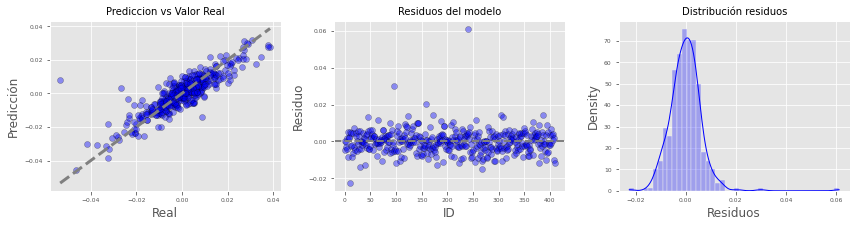

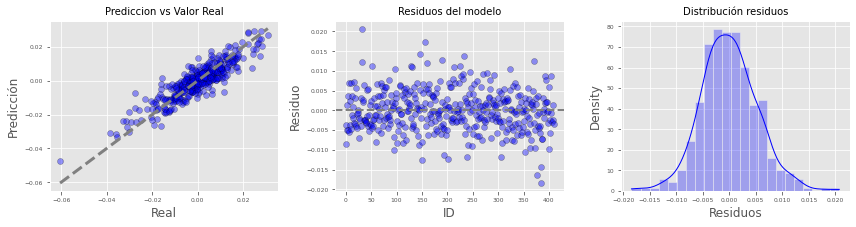

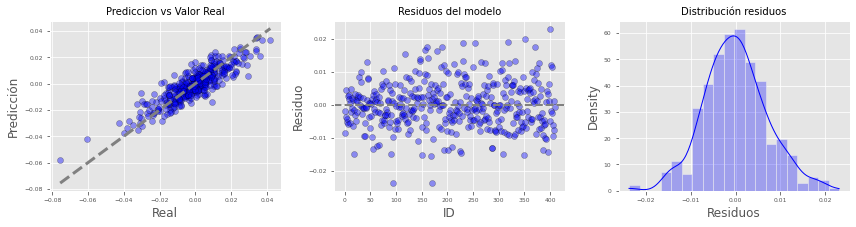

In [32]:
# REGRESIÓN Y RESIDUOS. PERIODO 3

items3= subset3[['HC', 'UT','EN']]

for i in items3:
    X = subset3[['ES', 'primaESG']]
    y = items3[i]

    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y.values.reshape(-1,1),
                                            train_size   = 0.8,
                                            random_state = 1234,
                                            shuffle      = True
                                        )
    X_train = sm.add_constant(X_train, prepend=True)
    modelo = sm.OLS(endog=y_train, exog=X_train,)
    modelo = modelo.fit()
    print("Modelo", [i], modelo.summary())

    
    #ESTUDIO DE LOS RESIDUOS
    #cálculo de los residuos
    y_train = y_train.flatten() 
    prediccion_train = modelo.predict(exog = X_train)
    residuos_train   = prediccion_train - y_train
    
    #gráficas de los residuos
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

    axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4, color='blue')
    axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                    'k--', color = 'grey', lw=3)
    axes[0, 0].set_title('Prediccion vs Valor Real', fontsize = 10)
    axes[0, 0].set_xlabel('Real')
    axes[0, 0].set_ylabel('Predicción')
    axes[0, 0].tick_params(labelsize = 6)

    axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                       edgecolors=(0, 0, 0), alpha = 0.4, color='blue')
    axes[0, 1].axhline(y = 0, linestyle = '--', color = 'grey', lw=2)
    axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
    axes[0, 1].set_xlabel('ID')
    axes[0, 1].set_ylabel('Residuo')
    axes[0, 1].tick_params(labelsize = 6)

    sns.histplot(
        data    = residuos_train,
        stat    = "density",
        kde     = True,
        line_kws= {'linewidth': 1},
        color   = "blue",
        alpha   = 0.3,
        ax      = axes[0, 2]
    )

    axes[0, 2].set_title('Distribución residuos', fontsize = 10)
    axes[0, 2].set_xlabel("Residuos")
    axes[0, 2].tick_params(labelsize = 6)

    # Se eliminan los ejes vacíos
    fig.delaxes(axes[1,0])
    fig.delaxes(axes[1,1])
    fig.delaxes(axes[1,2])

    fig.tight_layout()
    plt.subplots_adjust(top=0.9);

    #SHAPIRO
    shapiro_test = stats.shapiro(residuos_train)
    print([i], shapiro_test)

    #PREDICCIONES
    X_test = sm.add_constant(X_test, prepend=True)
    predicciones = modelo.predict(exog = X_test)
    rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
    print("")
    print([i],f"RMSE: {rmse}")


Modelo ['HC']                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     344.6
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           2.74e-88
Time:                        00:21:05   Log-Likelihood:                 1515.4
No. Observations:                 410   AIC:                            -3025.
Df Residuals:                     407   BIC:                            -3013.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -

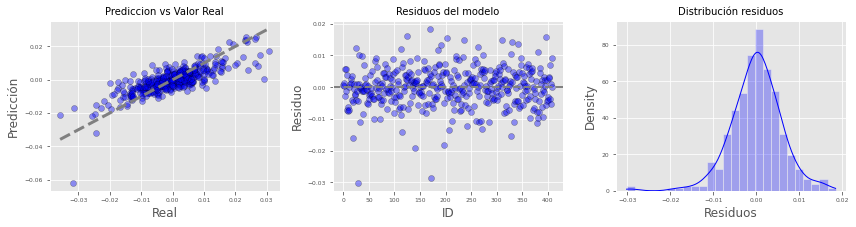

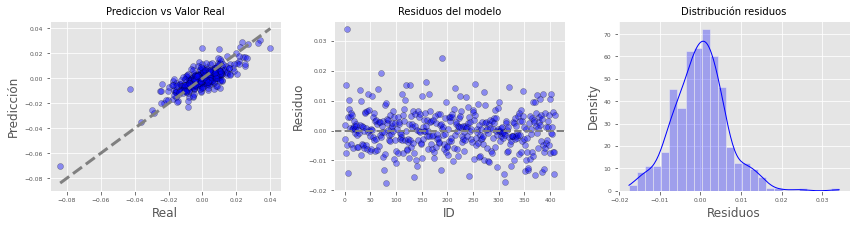

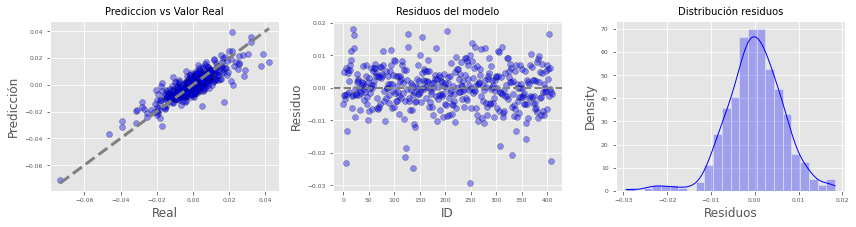

In [33]:
#PERIODO 4

items4= subset4[['HC', 'UT','EN']]
for i in items4:
    X = subset4[['ES', 'primaESG']]
    y = items4[i]

    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y.values.reshape(-1,1),
                                            train_size   = 0.8,
                                            random_state = 1234,
                                            shuffle      = True
                                        )
    X_train = sm.add_constant(X_train, prepend=True)
    modelo = sm.OLS(endog=y_train, exog=X_train,)
    modelo = modelo.fit()
    print("Modelo", [i], modelo.summary())

    #ESTUDIO DE LOS RESIDUOS
    #cálculo de los residuos
    y_train = y_train.flatten() 
    prediccion_train = modelo.predict(exog = X_train)
    residuos_train   = prediccion_train - y_train
    
    #gráficas de los residuos
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

    axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4, color='blue')
    axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                    'k--', color = 'grey', lw=3)
    axes[0, 0].set_title('Prediccion vs Valor Real', fontsize = 10)
    axes[0, 0].set_xlabel('Real')
    axes[0, 0].set_ylabel('Predicción')
    axes[0, 0].tick_params(labelsize = 6)

    axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                       edgecolors=(0, 0, 0), alpha = 0.4, color='blue')
    axes[0, 1].axhline(y = 0, linestyle = '--', color = 'grey', lw=2)
    axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
    axes[0, 1].set_xlabel('ID')
    axes[0, 1].set_ylabel('Residuo')
    axes[0, 1].tick_params(labelsize = 6)

    sns.histplot(
        data    = residuos_train,
        stat    = "density",
        kde     = True,
        line_kws= {'linewidth': 1},
        color   = "blue",
        alpha   = 0.3,
        ax      = axes[0, 2]
    )

    axes[0, 2].set_title('Distribución residuos', fontsize = 10)
    axes[0, 2].set_xlabel("Residuos")
    axes[0, 2].tick_params(labelsize = 6)

    # Se eliminan los ejes vacíos
    fig.delaxes(axes[1,0])
    fig.delaxes(axes[1,1])
    fig.delaxes(axes[1,2])

    fig.tight_layout()
    plt.subplots_adjust(top=0.9);

    #SHAPIRO
    shapiro_test = stats.shapiro(residuos_train)
    print([i], shapiro_test)
    
    #PREDICCIONES
    X_test = sm.add_constant(X_test, prepend=True)
    predicciones = modelo.predict(exog = X_test)
    rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
    print("")
    print([i],f"RMSE: {rmse}")


Modelo ['HC']                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     491.7
Date:                Wed, 16 Jun 2021   Prob (F-statistic):          3.45e-109
Time:                        00:21:07   Log-Likelihood:                 1581.4
No. Observations:                 409   AIC:                            -3157.
Df Residuals:                     406   BIC:                            -3145.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -

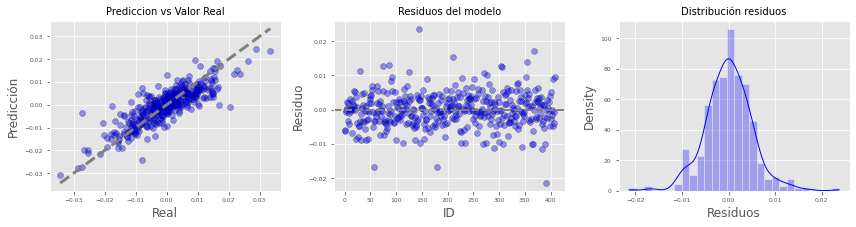

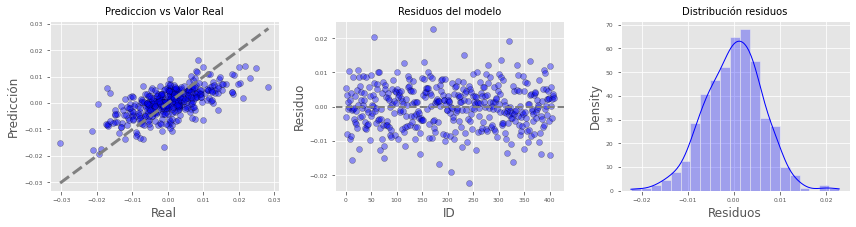

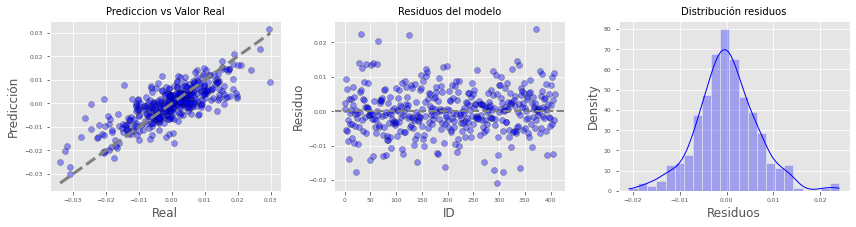

In [34]:
#PREDICCION Y RESIDUOS PERÍODOO 5

items5= subset5[['HC', 'UT','EN']]

for i in items5:
    X = subset5[['ES', 'primaESG']]
    y = items5[i]

    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y.values.reshape(-1,1),
                                            train_size   = 0.8,
                                            random_state = 1234,
                                            shuffle      = True
                                        )
    X_train = sm.add_constant(X_train, prepend=True)
    modelo = sm.OLS(endog=y_train, exog=X_train,)
    modelo = modelo.fit()
    print("Modelo", [i], modelo.summary())
    
    #ESTUDIO DE LOS RESIDUOS
    #cálculo de los residuos
    y_train = y_train.flatten() 
    prediccion_train = modelo.predict(exog = X_train)
    residuos_train   = prediccion_train - y_train
    
    #gráficas de los residuos
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

    axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4, color='blue')
    axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                    'k--', color = 'grey', lw=3)
    axes[0, 0].set_title('Prediccion vs Valor Real', fontsize = 10)
    axes[0, 0].set_xlabel('Real')
    axes[0, 0].set_ylabel('Predicción')
    axes[0, 0].tick_params(labelsize = 6)

    axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                       edgecolors=(0, 0, 0), alpha = 0.4, color='blue')
    axes[0, 1].axhline(y = 0, linestyle = '--', color = 'grey', lw=2)
    axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
    axes[0, 1].set_xlabel('ID')
    axes[0, 1].set_ylabel('Residuo')
    axes[0, 1].tick_params(labelsize = 6)

    sns.histplot(
        data    = residuos_train,
        stat    = "density",
        kde     = True,
        line_kws= {'linewidth': 1},
        color   = "blue",
        alpha   = 0.3,
        ax      = axes[0, 2]
    )

    axes[0, 2].set_title('Distribución residuos', fontsize = 10)
    axes[0, 2].set_xlabel("Residuos")
    axes[0, 2].tick_params(labelsize = 6)

    # Se eliminan los ejes vacíos
    fig.delaxes(axes[1,0])
    fig.delaxes(axes[1,1])
    fig.delaxes(axes[1,2])

    fig.tight_layout()
    plt.subplots_adjust(top=0.9);

    #SHAPIRO
    shapiro_test = stats.shapiro(residuos_train)
    print([i], shapiro_test)
    
    #PREDICCIONES
    X_test = sm.add_constant(X_test, prepend=True)
    predicciones = modelo.predict(exog = X_test)
    rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
    print("")
    print([i],f"RMSE: {rmse}")


Modelo ['HC']                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     514.3
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           1.69e-87
Time:                        00:21:09   Log-Likelihood:                 883.88
No. Observations:                 243   AIC:                            -1762.
Df Residuals:                     240   BIC:                            -1751.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.000     -

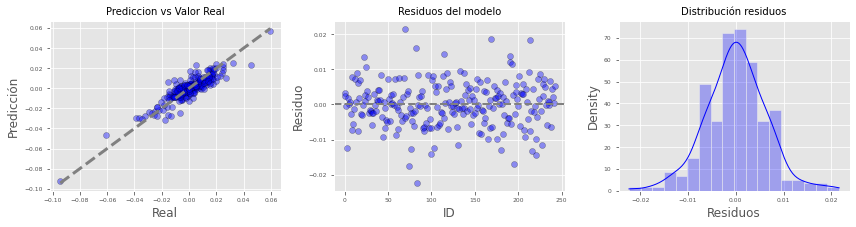

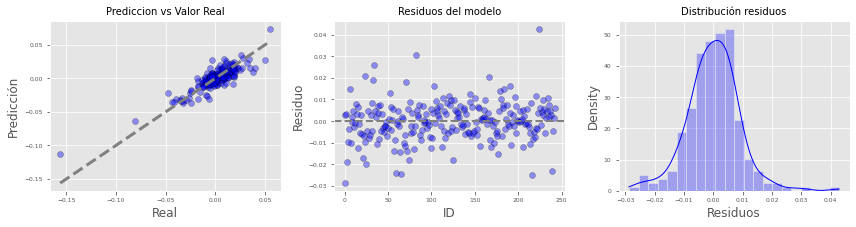

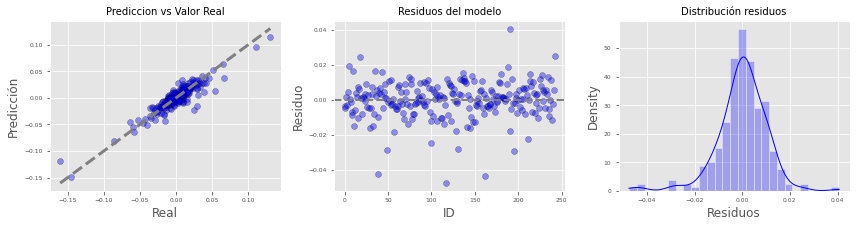

In [35]:
#REGRESIÓN Y RESIDUOS PERIODO 6

items6= subset6[['HC', 'UT','EN']]


for i in items5:               
    X = subset6[['ES', 'primaESG']]
    y = items6[i]

    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y.values.reshape(-1,1),
                                            train_size   = 0.8,
                                            random_state = 1234,
                                            shuffle      = True
                                        )
    X_train = sm.add_constant(X_train, prepend=True)
    modelo = sm.OLS(endog=y_train, exog=X_train,)
    modelo = modelo.fit()
    print("Modelo", [i], modelo.summary())
    
    #ESTUDIO DE LOS RESIDUOS
    #cálculo de los residuos
    y_train = y_train.flatten() 
    prediccion_train = modelo.predict(exog = X_train)
    residuos_train   = prediccion_train - y_train
    
    #gráficas de los residuos
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

    axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4, color='blue')
    axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                    'k--', color = 'grey', lw=3)
    axes[0, 0].set_title('Prediccion vs Valor Real', fontsize = 10)
    axes[0, 0].set_xlabel('Real')
    axes[0, 0].set_ylabel('Predicción')
    axes[0, 0].tick_params(labelsize = 6)

    axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                       edgecolors=(0, 0, 0), alpha = 0.4, color='blue')
    axes[0, 1].axhline(y = 0, linestyle = '--', color = 'grey', lw=2)
    axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
    axes[0, 1].set_xlabel('ID')
    axes[0, 1].set_ylabel('Residuo')
    axes[0, 1].tick_params(labelsize = 6)

    sns.histplot(
        data    = residuos_train,
        stat    = "density",
        kde     = True,
        line_kws= {'linewidth': 1},
        color   = "blue",
        alpha   = 0.3,
        ax      = axes[0, 2]
    )

    axes[0, 2].set_title('Distribución residuos', fontsize = 10)
    axes[0, 2].set_xlabel("Residuos")
    axes[0, 2].tick_params(labelsize = 6)

    # Se eliminan los ejes vacíos
    fig.delaxes(axes[1,0])
    fig.delaxes(axes[1,1])
    fig.delaxes(axes[1,2])

    fig.tight_layout()
    plt.subplots_adjust(top=0.9);

    #SHAPIRO
    shapiro_test = stats.shapiro(residuos_train)
    print([i], shapiro_test)
    #REGRESIÓN
    X_test = sm.add_constant(X_test, prepend=True)
    predicciones = modelo.predict(exog = X_test)
    rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
    print("")
    print([i],f"RMSE: {rmse}")
